Problem Statement

Objective:

Analyze the historical stock prices of major technology companies to understand their daily returns, annualized performance, risk, and relationships between them. This analysis will provide insights for portfolio construction, risk management, and investment decisions.

Context:

Investors often need to evaluate multiple stocks over time to identify trends, volatility, and correlations. By calculating daily returns, annualized mean returns, and annualized volatility, investors can compare expected performance and risk. Plotting stock prices and trends helps visualize historical behavior and market patterns.

Data:

A CSV file containing daily adjusted closing prices for four major stocks: AAPL, MSFT, TSLA, and AMZN.

Date range: 2023–2024 (business days).

Tasks / Questions to Answer:

Load and inspect the stock price data.

Compute daily returns for each stock.

Calculate annualized mean returns and annualized volatility (risk) for each stock.

Analyze the correlation between stock returns.

Visualize historical stock prices for individual stocks (AAPL) and compare multiple stocks on the same plot.

Use these analyses to interpret potential investment strategies or portfolio decisions.

Expected Output:

A table showing annualized mean returns for each stock.

A table showing annualized volatility for each stock.

A correlation matrix showing relationships between stocks.

Line plots showing historical stock price trends for AAPL and comparative trends for all four stocks.

First 5 rows:
                   AAPL        MSFT        TSLA        AMZN
2023-01-02  131.382457  243.870580  224.229181  108.045887
2023-01-03  131.111114  248.518080  232.949080  105.200640
2023-01-04  132.901276  259.239927  226.596244  103.221030
2023-01-05  137.042559  264.774519  229.306196  105.468445
2023-01-06  136.496709  256.914052  226.482783  103.539640

Last 5 rows:
                   AAPL        MSFT        TSLA        AMZN
2023-12-11  142.771697  328.643140  187.269615  228.826830
2023-12-12  141.515462  322.055513  188.100219  237.214187
2023-12-13  139.765399  321.054960  185.390135  240.420577
2023-12-14  144.798224  315.657266  183.252521  237.842408
2023-12-15  146.072395  307.148411  178.225314  240.732587

Annualized mean returns:
 AAPL    0.1541
MSFT    0.2834
TSLA   -0.1831
AMZN    0.8579
dtype: float64

Annualized volatilities:
 AAPL    0.3072
MSFT    0.3165
TSLA    0.3141
AMZN    0.3041
dtype: float64

Correlation matrix:
        AAPL   MSFT   TSLA   AMZN
AAP

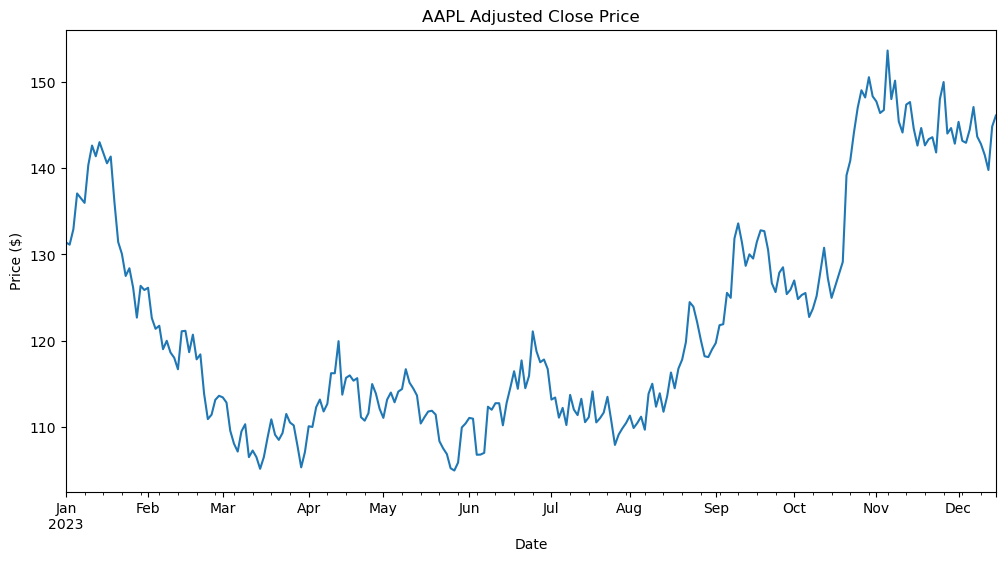

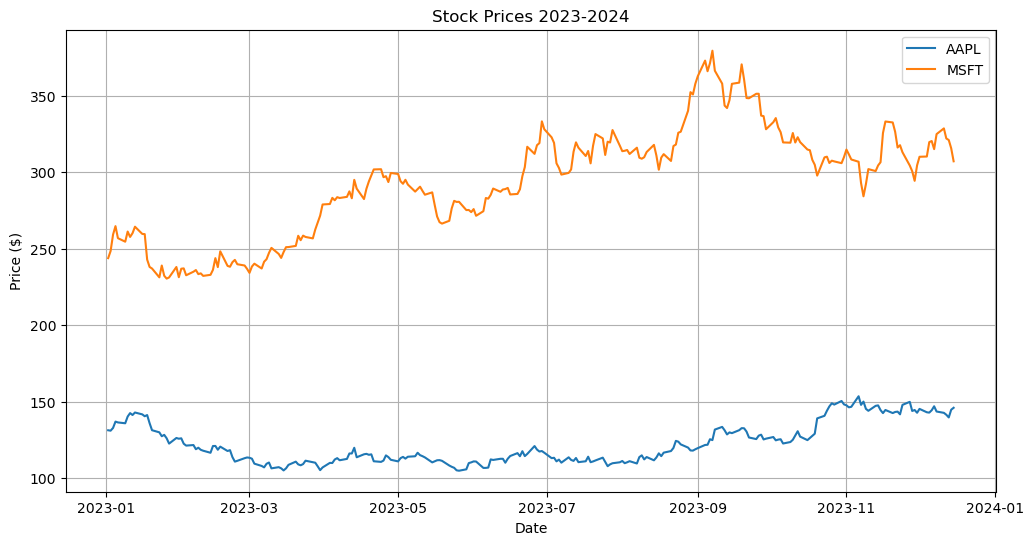

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the realistic stock prices CSV
df = pd.read_csv("realistic_stock_prices.csv", index_col=0, parse_dates=True)

# 2. Inspect the data
print("First 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

# 3. Calculate daily returns, annualized volatility, and annualized mean returns
daily_ret = df.pct_change().dropna()  # daily percentage change
ann_mean = daily_ret.mean() * 252     # annualized mean return
ann_std = daily_ret.std() * (252**0.5)  # annualized standard deviation (volatility)

# 4. Correlation matrix
corr = daily_ret.corr()

# 5. Print summary statistics
print("\nAnnualized mean returns:\n", ann_mean.round(4))
print("\nAnnualized volatilities:\n", ann_std.round(4))
print("\nCorrelation matrix:\n", corr.round(3))

# 6. Plot AAPL closing prices
plt.figure(figsize=(12,6))
df["AAPL"].plot(title="AAPL Adjusted Close Price")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.savefig("AAPL_Adjusted_Close_Price.png")
plt.show()


#7 plot stock price
plt.figure(figsize=(12,6))
plt.plot(df.index, df["AAPL"], label="AAPL")
plt.plot(df.index, df["MSFT"], label="MSFT")
plt.title("Stock Prices 2023-2024")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.savefig("AAPL_MSFT_prices.png")
plt.show()